In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [34]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
df.shape

(25, 2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [37]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


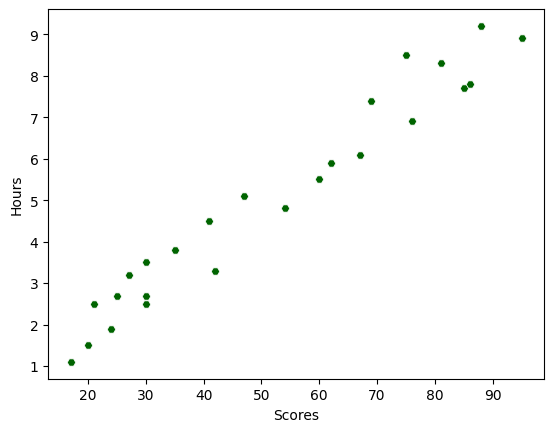

In [40]:
sns.scatterplot(data=df, x="Scores", y="Hours",marker="H",sizes=50,color="darkgreen")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


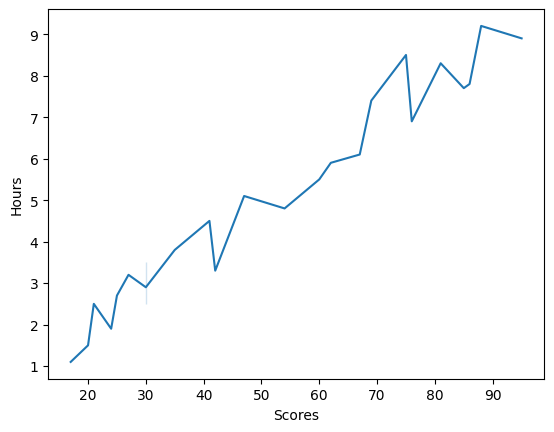

In [41]:
sns.lineplot(data=df, x="Scores", y="Hours")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


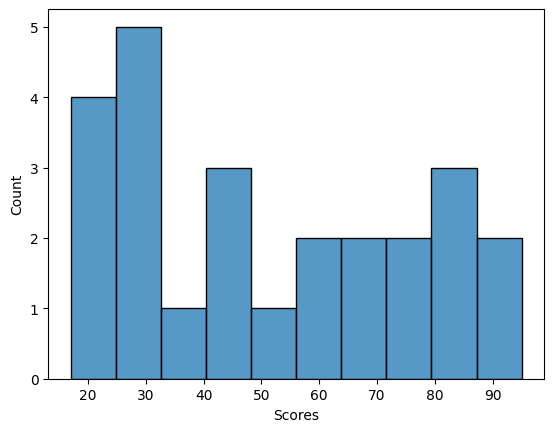

In [42]:
sns.histplot(data=df, x="Scores",bins=10)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


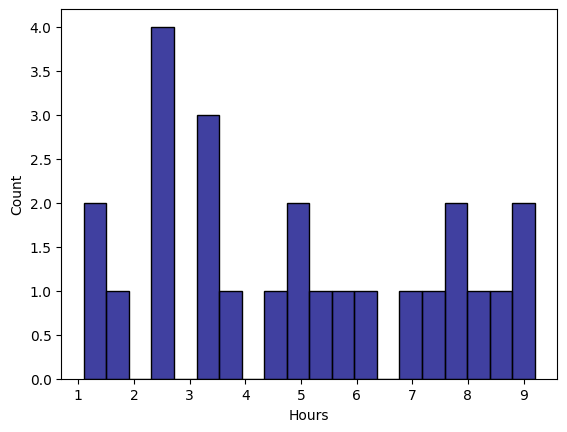

In [43]:
sns.histplot(data=df, x="Hours",bins=20,color="navy")
plt.show()

In [46]:
X=df.drop(columns="Scores",axis=1)

Y=df["Scores"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# GradientBoostingRegressor

In [52]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train,y_train)
pred1=gb_regressor.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 5.4001389161161795
Mean Squared Error (MSE): 31.703024069090976
R-squared (R2) Score: 0.946119945497806
Mean Absolute Percentage Error (MAPE): 12.793956904010814


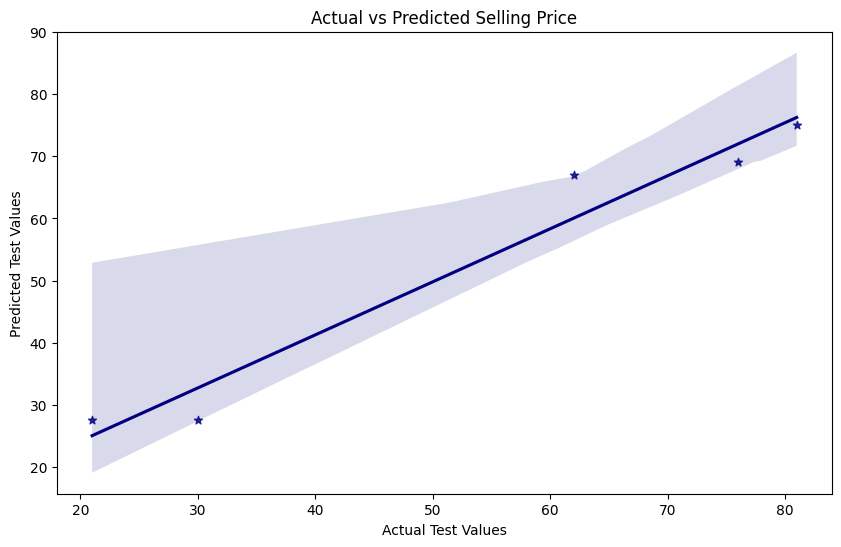

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=pred1, color="navy",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

# important feature

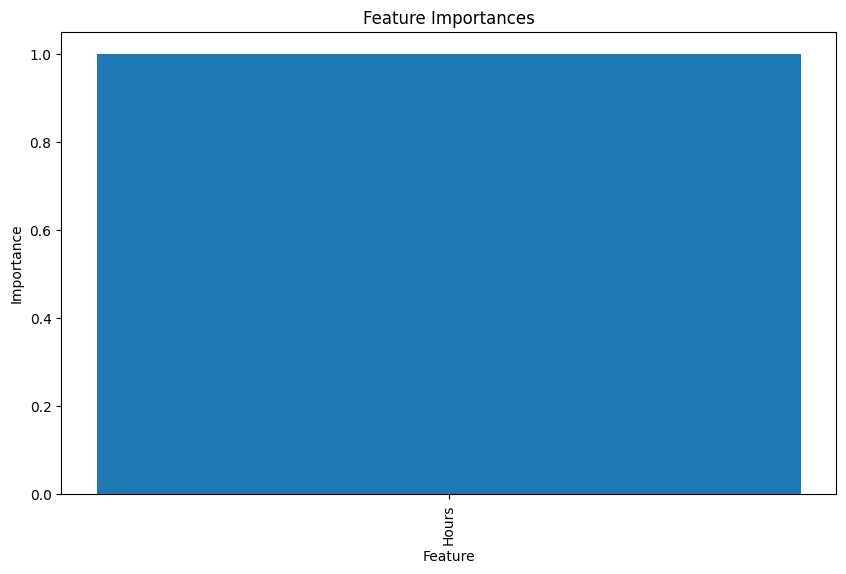

In [55]:
importances = gb_regressor.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [57]:
x=np.array([[9.25]])
score=gb_regressor.predict(x)
print(f"Score is : {score}")

Score is : [87.99901324]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
